In [9]:
# Import necessary libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Add this line

In [10]:
# Load your dataset
df = pd.read_csv("NYFull.csv")

In [11]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['County'] = label_encoder.fit_transform(df['County'])

# Convert 'Disease' column to binary (1 for INFLUENZA_A, 0 for others)
df['Disease'] = df['Disease'].apply(lambda x: 1 if x == 'INFLUENZA_A' else 0)

In [12]:
# Feature Scaling
scaler = StandardScaler()
numerical_columns = ['Year', 'Month', 'Week', 'Infected', 'Area', 'Population', 'Under_18', '18-24', '25-44', '45-64', 'Above_65', 'Median_age', 'Medianfamilyincome', 'Number_households', 'Unemp_rate']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Split the data into training and testing sets
X = df.drop('Disease', axis=1)
y = df['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Build the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7488187161461335
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83     11553
           1       0.72      0.40      0.52      5801

    accuracy                           0.75     17354
   macro avg       0.74      0.66      0.67     17354
weighted avg       0.74      0.75      0.73     17354

Confusion Matrix:
[[10647   906]
 [ 3453  2348]]


Grid Search

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
# Load the dataset
df = pd.read_csv('NYFull.csv')

In [17]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['County'] = label_encoder.fit_transform(df['County'])
df['Disease'] = label_encoder.fit_transform(df['Disease'])

# Convert 'Disease' column to binary (1 for INFLUENZA_A, 0 for others)
df['Disease'] = df['Disease'].apply(lambda x: 1 if x == 'INFLUENZA_A' else 0)

# Feature Scaling
scaler = StandardScaler()
numerical_columns = ['Year', 'Month', 'Week', 'Infected', 'Area', 'Population', 'Under_18', '18-24', '25-44', '45-64', 'Above_65', 'Median_age', 'Medianfamilyincome', 'Number_households', 'Unemp_rate']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [18]:
# Split the data into training and testing sets
X = df.drop('Disease', axis=1)
y = df['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

In [19]:
# Create the XGBoost classifier
xgb_classifier = XGBClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy with GridSearchCV: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy with GridSearchCV: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28923

    accuracy                           1.00     28923
   macro avg       1.00      1.00      1.00     28923
weighted avg       1.00      1.00      1.00     28923

Confusion Matrix:
[[28923]]


c:\Users\V Nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("NYFull.csv")

# Encode categorical variables
label_encoder = LabelEncoder()
df['County'] = label_encoder.fit_transform(df['County'])
df['Disease'] = df['Disease'].apply(lambda x: 1 if x == 'INFLUENZA_A' else 0)

# Choose a limited set of features
selected_features = ['Month', 'Infected', 'Area', 'Population', 'Under_18', 'Median_age', 'Medianfamilyincome', 'Unemp_rate']

# Feature Scaling
scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

# Split the data into training and testing sets
X = df[selected_features]
y = df['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7488187161461335
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83     11553
           1       0.72      0.40      0.52      5801

    accuracy                           0.75     17354
   macro avg       0.74      0.66      0.67     17354
weighted avg       0.74      0.75      0.73     17354

Confusion Matrix:
[[10647   906]
 [ 3453  2348]]


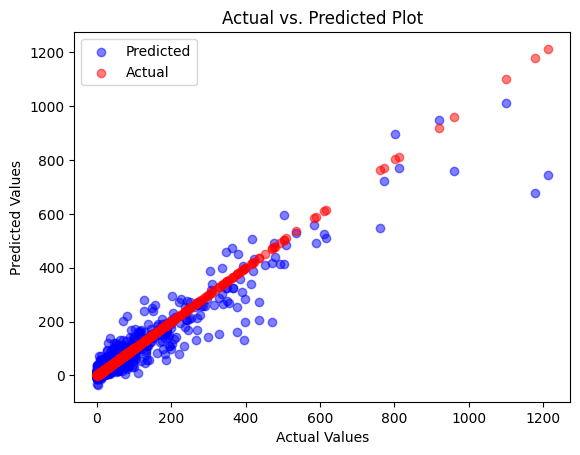

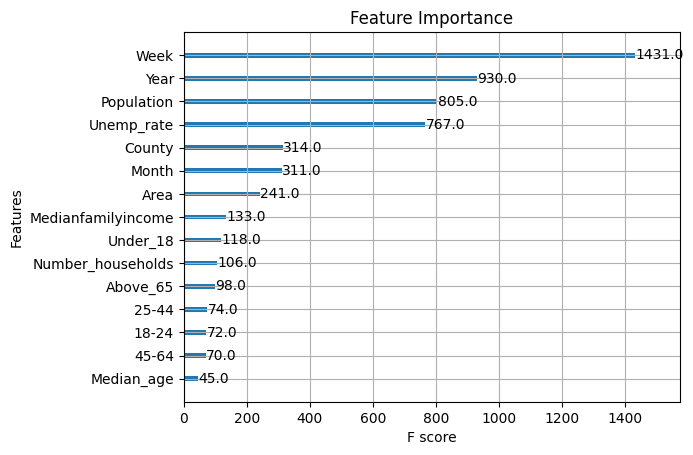

In [22]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor, plot_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv("NYFull.csv")

df = df[df['Disease'] == 'INFLUENZA_A']

X = df.drop("Infected", axis=1)
y = df["Infected"]

for col in X.select_dtypes(include=["object"]):
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

plt.scatter(y_test, predictions, c='blue', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='red', label='Actual', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Plot")
plt.legend()
plt.show()

plot_importance(model)
plt.title("Feature Importance")
plt.show()

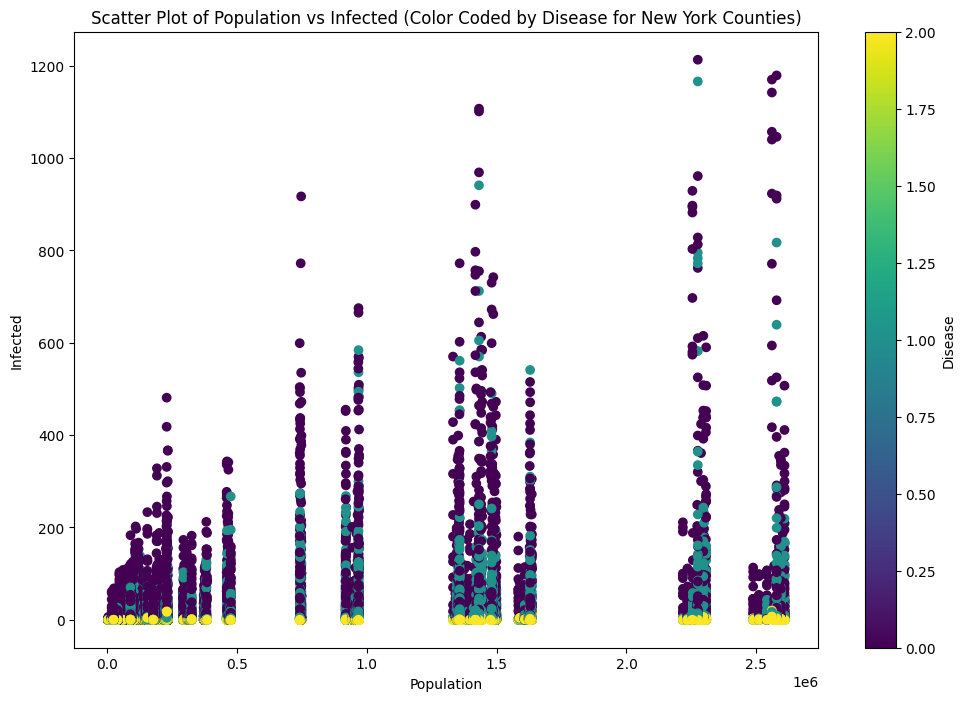

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data from the CSV file
df = pd.read_csv("NYFull.csv")

# Convert the 'Disease' column to numeric using Label Encoding
label_encoder = LabelEncoder()
df['Disease_encoded'] = label_encoder.fit_transform(df['Disease'])

# Create a scatter plot to visualize the relationships between columns
plt.figure(figsize=(12, 8))
plt.scatter(df['Population'], df['Infected'], c=df['Disease_encoded'], cmap='viridis')
plt.xlabel('Population')
plt.ylabel('Infected')
plt.title('Scatter Plot of Population vs Infected (Color Coded by Disease for New York Counties)')
plt.colorbar(label='Disease')
plt.show()